# k-Nearest Neighbors: Fit

In [10]:
import pandas as pd

churn_df = pd.read_csv('Downloads/telecom_churn_clean.csv')
churn_df.info()
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df['churn'].values
x = churn_df[["account_length", "customer_service_calls"]]

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
# Fit the classifier to the data
knn.fit(x,y)

# Create X_new
import numpy as np

X_new = pd.DataFrame(np.random.rand(1,16))

# Predict the labels for the training data X
y_pred = knn.predict(x)

# Predict and print the label for the new data point X_new
new_pred = knn.predict(X_new)
print('prediction: {}'.format(new_pred))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 16 features, but KNeighborsClassifier is expecting 2 features as input.

## Train/test split + computing accuracy

In [11]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


## Overfitting and Underfitting

In [12]:
# Create neighbors
neighbors = np.arange(1,12)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors= neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287}


## Visualizing model complexity

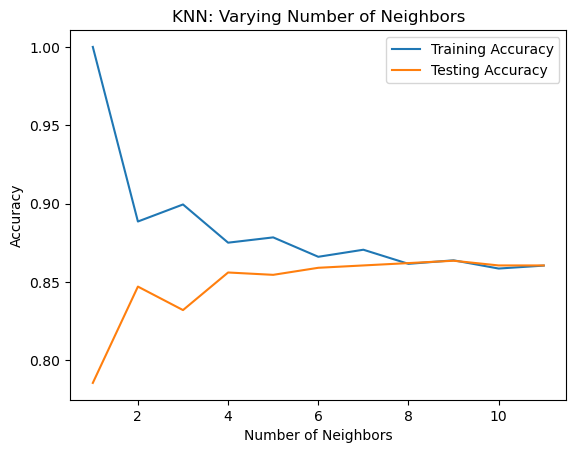

In [14]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Regression

In [16]:
import numpy as np

sales_df = pd.read_csv('Downloads/advertising_and_sales_clean.csv')

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546, 1)


In [17]:
## Building a linear regression model
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[[ 95491.17119147]
 [117829.51038393]
 [173423.38071499]
 [291603.11444202]
 [111137.28167129]]


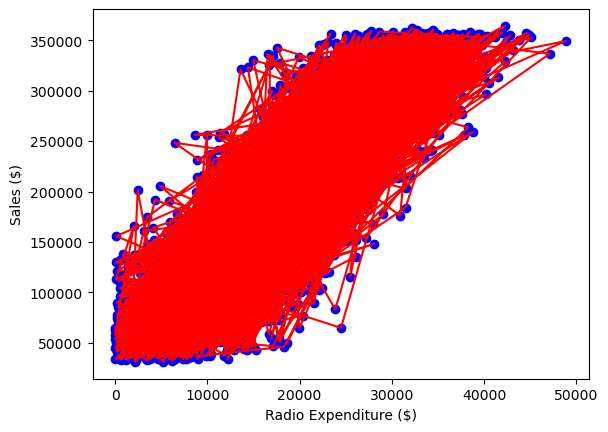

In [18]:
## Visualizing a linear regression model

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, y, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Fit and predict for regression

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

ValueError: could not convert string to float: 'Macro'

In [21]:
## Regrssion Performance
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared= False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
## Crossvalidation for R-squared
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits= 6, shuffle= True, random_state= 5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

ValueError: 
All the 6 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 648, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Mega'


In [23]:
## Analyszing Cross validation metrics
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

NameError: name 'cv_results' is not defined

In [24]:
## Regularized Regression: Ridge

# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

ValueError: could not convert string to float: 'Macro'

In [25]:
## Lasso regression for feature importance

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha =0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

ValueError: could not convert string to float: 'Mega'

# Fine tuning the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

diabetes = pd.read_csv('Downloads/diabetes_clean.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.insulin.replace(0, np.nan, inplace =True)
diabetes.triceps.replace(0, np.nan, inplace =True)
diabetes.bmi.replace(0, np.nan, inplace = True)

In [6]:
diabetes.iloc[:,1:] = diabetes.iloc[:,1:].apply(lambda x:x.fillna(x.mean()))
y = diabetes['diabetes']
X = diabetes.drop('diabetes', axis = 1)

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 20)
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[181  57]
 [ 21  49]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       238
           1       0.46      0.70      0.56        70

    accuracy                           0.75       308
   macro avg       0.68      0.73      0.69       308
weighted avg       0.80      0.75      0.76       308



## Buliding a Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = logreg.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[177  45]
 [ 25  61]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83       222
           1       0.58      0.71      0.64        86

    accuracy                           0.77       308
   macro avg       0.73      0.75      0.74       308
weighted avg       0.79      0.77      0.78       308



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
logreg = LogisticRegression(solver = 'liblinear')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[173  49]
 [ 29  57]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       222
           1       0.54      0.66      0.59        86

    accuracy                           0.75       308
   macro avg       0.70      0.72      0.70       308
weighted avg       0.77      0.75      0.75       308



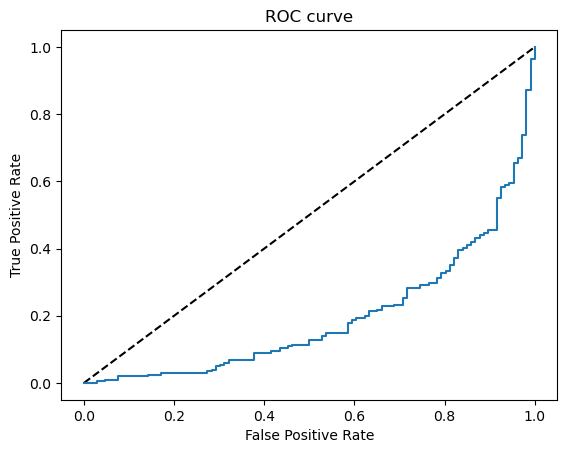

In [25]:
## Plotting an ROC curve
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
tpr, fpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label ='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Precision - Recall curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


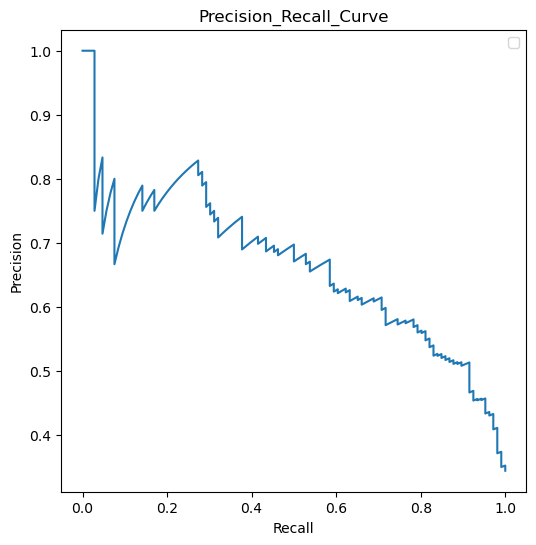

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize = (6,6), dpi = None)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve')
plt.legend(loc ='best')
plt.show()

### Computing AUC

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv =5, scoring = 'roc_auc')

print('AUC scores computed using 5-fold cross-validation: {}'.format(cv_auc))

AUC: 0.8056697179151877
AUC scores computed using 5-fold cross-validation: [0.80185185 0.80648148 0.81481481 0.86245283 0.8554717 ]


## Hyperparameter tuning with GridSearchCV

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5,8,15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver = 'liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv =5)

# Fit to the data
logreg_cv.fit(X,y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best score is :{}'.format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is :0.7708768355827178


## Hyperparameter tuning with RandomizedSearchCV


In [32]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,None],
             'max_features':randint(1,9),
             'min_samples_leaf':randint(1,9),
             'criterion':['gini','entropy']}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X,y)

# Print the tuned parameters and score
print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Best score is: {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is: 0.7370681605975724


# Hold-out set in practice I: Classification

In [35]:
# Create the hyperparameter grid
c_space = np.logspace(-5,8,15)
param_grid = {"C": c_space, 'penalty' : ['l1','l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7739130434782608


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Hold-out set in practice II: Regression

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create the hyperparameter grid
l1_space = np.linspace(0,1,30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.858e+01, tolerance: 8.437e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.889e+01, tolerance: 8.286e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.034482758620689655}
Tuned ElasticNet R squared: 0.25110015989224854
Tuned ElasticNet MSE: 0.1658783462677525


# Preprocessing and Pipelines

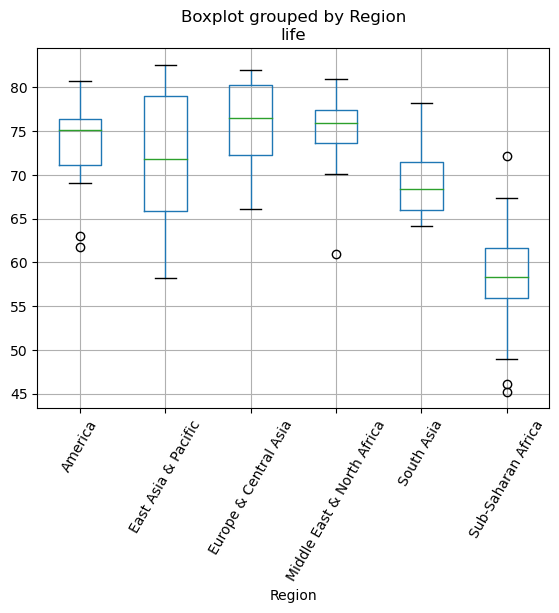

In [44]:
## Exploring Categorical variables

df = pd.read_csv('Downloads/gapminder.csv')
df.head()

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot =60)
plt.show()

In [46]:
## Creating Dummy variables

# Create dummy variables: df_region
df_region = pd.get_dummies(df)

print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first = True)

## Print new columns of dummies
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


## Regression with categorical feature

In [55]:
df_region = pd.get_dummies(df)

df_region = df_region.drop('Region_America', axis = 1)

X = df_region.drop('life', axis = 1).values
y = df_region['life'].values
print(X)
print(y)

[[3.4811059e+07 2.7300000e+00 1.0000000e-01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.9842251e+07 6.4300000e+00 2.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [4.0381860e+07 2.2400000e+00 5.0000000e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.6589342e+07 1.8600000e+00 4.0000000e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.3114579e+07 5.8800000e+00 1.3600000e+01 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [1.3495462e+07 3.8500000e+00 1.5100000e+01 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]
[75.3 58.3 75.5 72.5 81.5 80.4 70.6 72.2 68.4 75.3 70.1 79.4 70.7 63.2
 67.6 70.9 61.2 73.9 73.2 59.4 57.4 66.2 56.6 80.7 54.8 78.9 75.1 62.6
 58.6 79.7 55.9 76.5 77.8 78.7 61.  74.  70.1 74.1 56.7 60.4 74.  65.7
 79.4 81.  57.5 62.2 72.1 80.  62.7 79.5 70.8 58.3 51.3 63.  61.7 70.9
 73.8 82.  64.4 69.5 76.9 79.4 80.9 81.4 75.5 82.6 66.1 61.5 72.3 77.6
 45.2 61.  72.  80.7 63.4 51.4 74.5 78.2 55.8 81.4 63.6 72.1 75.7 69.6
 63.2 73.3

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X,y, cv=5)

print(ridge_cv)

[0.81983794 0.80610503 0.89878122 0.80461851 0.94075361]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00992e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01979e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.37421e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03719e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

## Dropping missing data

In [66]:
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/house-votes-84.csv', 
                 header =None, names = ['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education',
 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])

df.head()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [77]:
df = df.reset_index()
df.head()

df[df == 'y'] = 1
df[df == 'n'] = 0
df.head()

ValueError: cannot insert level_0, already exists

In [74]:
# Convert '?' to NaN
df[df == '?'] = np.nan

print(df.isnull().sum())

print('Shape of the dataframe: {}'.format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
level_0                0
party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of the dataframe: (435, 19)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 19)


## Imputing missing data in a ML Pipeline I



In [100]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values = 'NaN', strategy = 'most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp), ('SVM', clf)]


## Imputing missing data in a ML Pipeline II

In [ ]:
# Split data 
X = df.drop('party', axis = 1)
y = df['party']

from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = )